In [9]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-02-car-price/02-carprice.ipynb

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [11]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

### See if fuel efficiency has a long tail

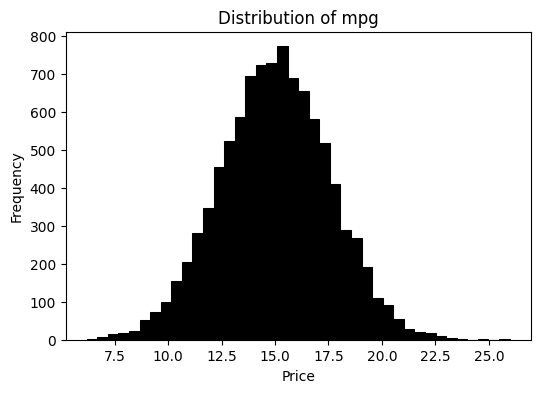

In [13]:
plt.figure(figsize=(6, 4))

sns.histplot(df.fuel_efficiency_mpg, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of mpg')

plt.show()

### Q1: There's one column with missing values. What is it?

In [ ]:
# horse power has missing values
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Q2: What's the median (50% percentile) for variable 'horsepower'?

In [ ]:
# 149.000000
df['horsepower'].describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

In [18]:
idx = np.arange(df.index.size)


In [19]:
idx

array([   0,    1,    2, ..., 9701, 9702, 9703], shape=(9704,))

In [20]:
np.random.seed(42)

In [21]:
np.random.shuffle(idx)

In [23]:
df_shuffled = df.iloc[idx]

n = df_shuffled.index.size
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [24]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [25]:
df_train.index.size, df_val.index.size, df_test.index.size

(5824, 1940, 1940)

### Q3 Which option gives better RMSE?
Anwer: With mean  (0.45 vs 0.52)

In [ ]:
mean_train = df_train['horsepower'].mean()

In [68]:
mean_train 

np.float64(149.54476367006487)

In [36]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [31]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [95]:
def prepare_X(df, repalce_with):
    df_num = df[base]
    df_num = df_num.fillna(repalce_with)
    
    X = df_num.values
    return X

In [60]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

### Replacing missing values with zero

In [65]:
def q3_run (replace_with):
    df_train_copy = df_train.copy()
    df_val_copy = df_val.copy()
    X_train = prepare_X(df_train_copy, replace_with)
    y_train = df_train_copy.fuel_efficiency_mpg.values
    
    w_0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val_copy, replace_with)
    y_val = df_val_copy.fuel_efficiency_mpg.values
    
    
    y_pred = w_0 + X_val.dot(w)
    
    
    print(rmse(y_pred, y_val).round(2))
    

In [ ]:
# 0.52
q3_run(0)

0.52


In [69]:
q3_run(mean_train)

0.46


### Question 4
Reqularization  Multiple options show same error.  So R = 0

In [72]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
df_train_copy = df_train.copy()

In [80]:
df_train_copy.isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [ ]:
df_val_copy = df_val.copy()
X_train = prepare_X(df_train_copy, 0)
y_train = df_train_copy.fuel_efficiency_mpg.values


In [ ]:


X_val = prepare_X(df_val_copy, 0)
y_val = df_val_copy.fuel_efficiency_mpg.values

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64


In [88]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print(f"r={r} Error={rmse(y_pred, y_val).round(2)}")

r=0 Error=0.52
r=0.01 Error=0.52
r=0.1 Error=0.52
r=1 Error=0.52
r=5 Error=0.52
r=10 Error=0.52
r=100 Error=0.52


### Question 5  Std: 0.01

In [111]:
scores = []
for seed_value in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
   np.random.seed(seed_value)
   idx = np.arange(df.index.size)
   np.random.shuffle(idx)
   
   df_shuffled = df.iloc[idx]
   
   df_train = df_shuffled.iloc[:n_train].copy()
   df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
   df_test = df_shuffled.iloc[n_train+n_val:].copy()
   
   X_train = prepare_X(df_train, 0)
   y_train = df_train.fuel_efficiency_mpg.values
   
   X_val = prepare_X(df_val, 0)
   y_val = df_val.fuel_efficiency_mpg.values
    
   w_0, w = train_linear_regression(X_train, y_train)
   
   y_pred = w_0 + X_val.dot(w) 
   scores.append(rmse(y_pred, y_val).round(2))
   #print(f"seed: {seed_value} Error: {rmse(y_pred, y_val).round(2)}")


scores= np.array(scores)

In [129]:
scores.std().round(4)

np.float64(0.0075)

### Question 6  0.515

In [115]:
np.random.seed(9)
idx = np.arange(df.index.size)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()
   

In [118]:
df_combined = pd.concat([df_train, df_val])

In [120]:
X_train = prepare_X(df_combined, 0)
y_train = df_combined.fuel_efficiency_mpg.values

In [121]:
w_0, w= train_linear_regression_reg(X_train, y_train, 0.001)

In [122]:
X_test = prepare_X(df_test, 0)
y_test = df_test.fuel_efficiency_mpg.values

In [127]:
y_pred = w_0 + X_test.dot(w)
error = rmse(y_pred, y_test).round(4)

In [ ]:
error



np.float64(0.5156)